## observational data

### Load files as an xarray dataset
### listing the data

In [1]:
%load_ext autoreload
%autoreload 2
import cartopy
from glob import glob
import xarray as xr
import s3fs
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import functions as f
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))
# list avilable data in the bucket
# # path to the observation folder: bucket/forldername
s3DMS_Obs_data = s3.ls('/escience2022/Antoine/Satellite_Arctic_DMS')
s3DMS_Obs_data

['escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2003_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2004_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2005_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2006_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2007_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2008_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2009_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2010_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2011_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2012_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2013_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2014_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2015_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2016_8D_28km.nc',
 'esci

## Load one file as an xarray dataset

In [2]:
# path to the file: bucket/forlder/filename.nc
s3file1 = 's3://escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2015_8D_28km.nc'
#fdms_gsm_W97_S1998_8D_28km.nc'#fdms_L11_W97_CLIMdms_A2003_8D_28km.nc'
#dms_gsm_A2003_8D_28km.nc'#dmspt_gsm_A2003_8D_28km.nc'#dms_gsm_A2003_8D_28km.nc'
file = s3.open(s3file1)
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:      (pixel: 96668, year: 1, period: 46)
Coordinates:
  * year         (year) float64 2.015e+03
Dimensions without coordinates: pixel, period
Data variables:
    longitude    (pixel) float64 ...
    latitude     (pixel) float64 ...
    startjulday  (period) float64 ...
    endjulday    (period) float64 ...
    dms          (period, year, pixel) float64 ...

### fixing the coordinates to make them usable

In [3]:
ds=ds.assign_coords({
    "pixel": pd.MultiIndex.from_arrays([ds.latitude.values, ds.longitude.values.round()],names=["lat", "lon"])
                        }).unstack("pixel")
ds

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 361, year: 1, period: 46)
Coordinates:
  * lat          (lat) float64 45.12 45.38 45.62 45.88 ... 89.38 89.62 89.88
  * lon          (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * year         (year) float64 2.015e+03
Dimensions without coordinates: period
Data variables:
    longitude    (lat, lon) float64 -179.8 -178.8 -177.7 -176.6 ... nan nan nan
    latitude     (lat, lon) float64 45.12 45.12 45.12 45.12 ... nan nan nan nan
    startjulday  (period) float64 1.0 9.0 17.0 25.0 ... 337.0 345.0 353.0 361.0
    endjulday    (period) float64 8.0 16.0 24.0 32.0 ... 344.0 352.0 360.0 365.0
    dms          (period, year, lat, lon) float64 0.5345 0.2122 ... nan nan

### plotting the data

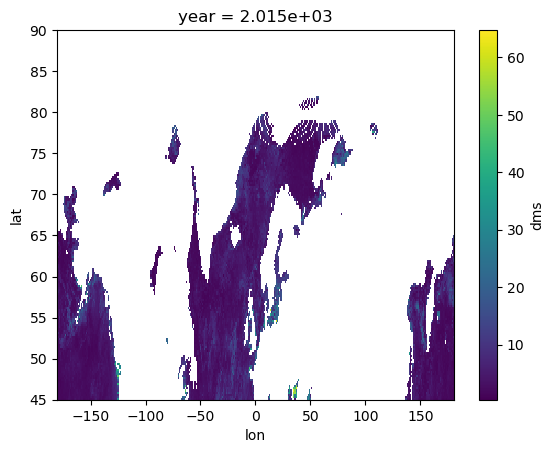

In [4]:
ds.dms.isel(period=20,year=0).plot()

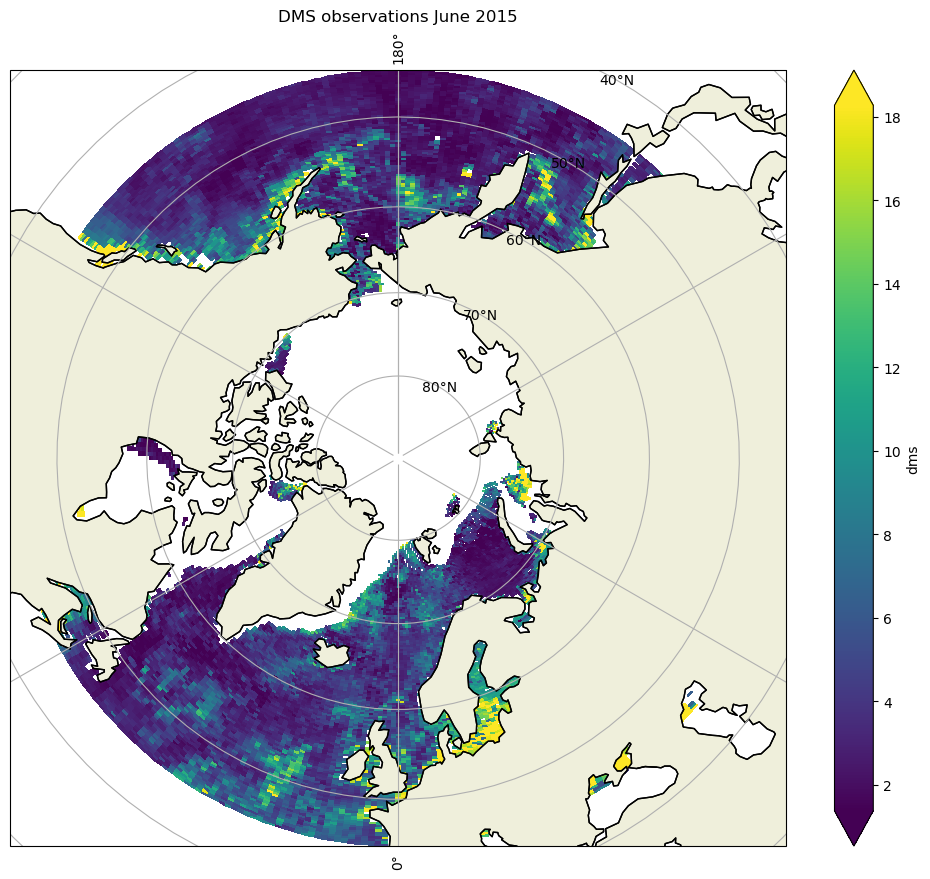

In [5]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ax.set_extent([-180, 180,45,90], ccrs.PlateCarree())
ds.dms.isel(period=20,year=0).plot.pcolormesh(
    ax = ax,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    transform=ccrs.PlateCarree(),
    robust=True,
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax.set_title('DMS observations June 2015')
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.tight_layout()
plt.savefig('DMS_Obs_June2015.png')

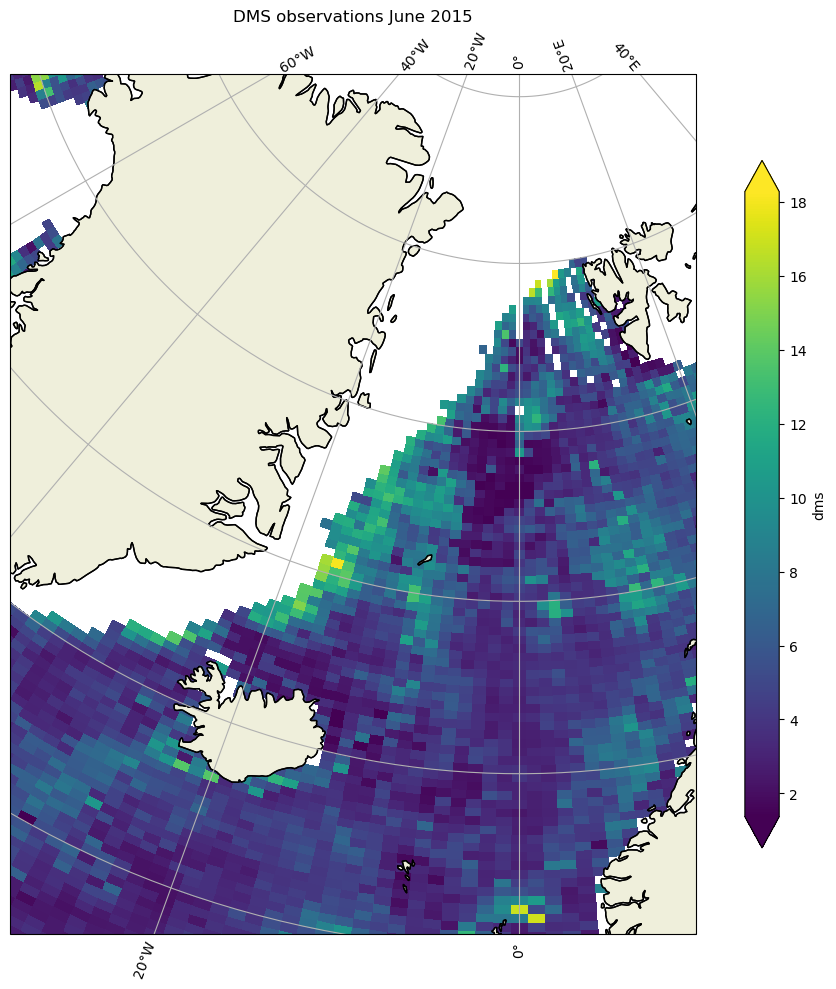

In [6]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ax.set_extent([-30, 10,85,60], ccrs.PlateCarree())
ds.dms.isel(period=20,year=0).plot(
    ax = ax,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    transform=ccrs.PlateCarree(),
    robust=True,
    
    
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax.set_title('DMS observations June 2015')
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.tight_layout()
plt.savefig('DMS_Obs_June2015_EastGreenland.png')

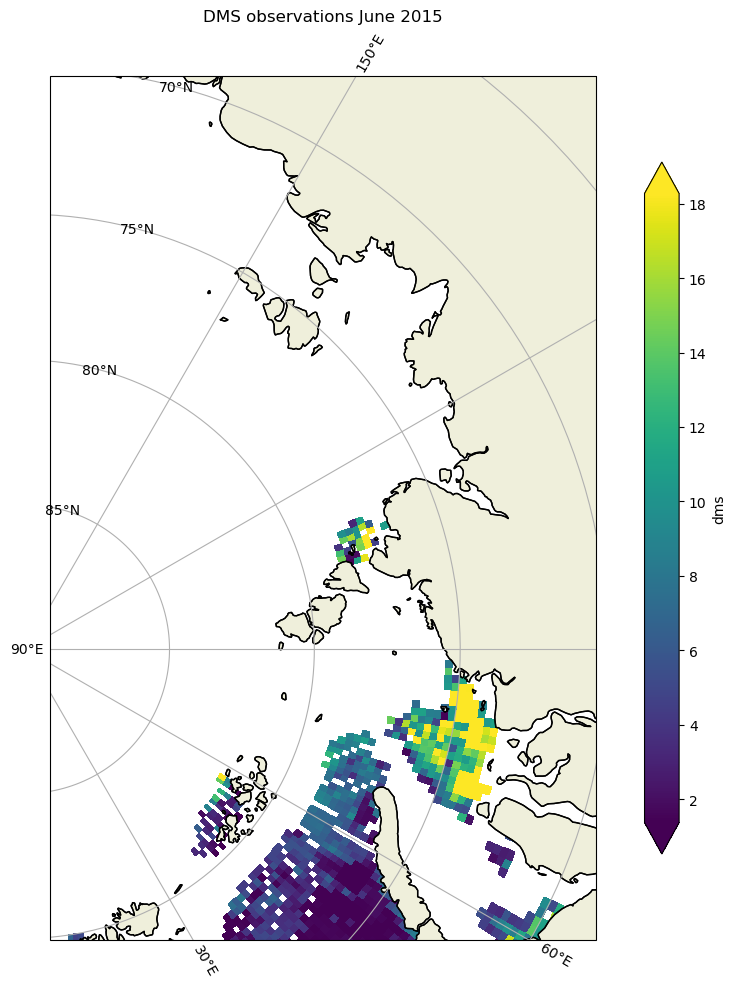

In [7]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ax.set_extent([60, 170,85,70], ccrs.PlateCarree())
ds.dms.isel(period=20,year=0).plot.pcolormesh(
    ax = ax,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    transform=ccrs.PlateCarree(),
    robust=True,
    
    
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax.set_title('DMS observations June 2015')
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.tight_layout()
plt.savefig('DMS_Obs_June2015_Siberia.png')

# Plotting the time series
read the file's name: regional_average.ipynb that can be found in https://github.com/eScience-course/Tjaernoe2022-group6/tree/main/notebooks/Ada

### open multiple files

In [8]:
%load_ext autoreload
%autoreload 2
import cartopy
import numpy as np
from glob import glob
import xarray as xr
import s3fs
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import functions as f
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))
# listing all avilable observational data in the bucket
# # path to the observation folder: bucket/forldername
s3DMS_Obs_data = s3.ls('/escience2022/Antoine/Satellite_Arctic_DMS')
s3DMS_Obs_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2003_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2004_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2005_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2006_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2007_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2008_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2009_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2010_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2011_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2012_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2013_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2014_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2015_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2016_8D_28km.nc',
 'esci

In [9]:
#### single file
# file = 's3://escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2010_8D_28km.nc'
# ds = xr.open_dataset(s3.open(file))

### multiple files
s3files = 's3://escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A*_8D_28km.nc'
remote_files = s3.glob(s3files)
fileset = [s3.open(file) for file in remote_files]
ds = xr.open_mfdataset(fileset, combine='by_coords')

ds

<xarray.Dataset>
Dimensions:      (year: 14, pixel: 96668, period: 46)
Coordinates:
  * year         (year) float64 2.003e+03 2.004e+03 ... 2.015e+03 2.016e+03
Dimensions without coordinates: pixel, period
Data variables:
    longitude    (year, pixel) float64 dask.array<chunksize=(1, 96668), meta=np.ndarray>
    latitude     (year, pixel) float64 dask.array<chunksize=(1, 96668), meta=np.ndarray>
    startjulday  (year, period) float64 dask.array<chunksize=(1, 46), meta=np.ndarray>
    endjulday    (year, period) float64 dask.array<chunksize=(1, 46), meta=np.ndarray>
    dms          (period, year, pixel) float64 dask.array<chunksize=(46, 1, 96668), meta=np.ndarray>

## plotting the time series of all data
### selecting the data
we select the years according to the fact that there are overlaping between DMS, salinity and sea-ice observational data periods.

In [10]:
ds = ds.isel(year = slice(7,None))
ds

<xarray.Dataset>
Dimensions:      (year: 7, pixel: 96668, period: 46)
Coordinates:
  * year         (year) float64 2.01e+03 2.011e+03 ... 2.015e+03 2.016e+03
Dimensions without coordinates: pixel, period
Data variables:
    longitude    (year, pixel) float64 dask.array<chunksize=(1, 96668), meta=np.ndarray>
    latitude     (year, pixel) float64 dask.array<chunksize=(1, 96668), meta=np.ndarray>
    startjulday  (year, period) float64 dask.array<chunksize=(1, 46), meta=np.ndarray>
    endjulday    (year, period) float64 dask.array<chunksize=(1, 46), meta=np.ndarray>
    dms          (period, year, pixel) float64 dask.array<chunksize=(46, 1, 96668), meta=np.ndarray>

#### calculating the mean
Given that we do not have normal lon lat system, but rather the lon and lat are defined by equal area of pixels, then we calculate the mean differently than how it's calculated in Ada's file mentioned above.

In [11]:
ds_8DayPixelAreaMean_2011To2016 = ds.mean(dim='pixel').compute() #.compute does the excution of the mean operation
ds_8DayPixelAreaMean_2011To2016

<xarray.Dataset>
Dimensions:      (year: 7, period: 46)
Coordinates:
  * year         (year) float64 2.01e+03 2.011e+03 ... 2.015e+03 2.016e+03
Dimensions without coordinates: period
Data variables:
    longitude    (year) float64 -5.833e-16 -5.833e-16 ... -5.833e-16 -5.833e-16
    latitude     (year) float64 60.32 60.32 60.32 60.32 60.32 60.32 60.32
    startjulday  (year, period) float64 1.0 9.0 17.0 25.0 ... 345.0 353.0 361.0
    endjulday    (year, period) float64 8.0 16.0 24.0 32.0 ... 352.0 360.0 365.0
    dms          (period, year) float64 0.5995 0.6358 0.6142 ... 0.5873 nan

### plotting the time series of the averages of each year

In [67]:
from datetime import datetime
day_of_year = ds_8DayPixelAreaMean_2011To2016.startjulday
day_of_year = [[datetime.strptime(str(int(year.values))+str(int(day.values)), '%Y%j') 
                                  for day in ds_8DayPixelAreaMean_2011To2016.sel(year=year).startjulday]
                                  for year in ds_8DayPixelAreaMean_2011To2016.year]
day_of_year
#plt.plot(np.array(day_of_year).T,ds_8DayPixelAreaMean_2011To2016.dms)

[[datetime.datetime(2010, 1, 1, 0, 0),
  datetime.datetime(2010, 1, 9, 0, 0),
  datetime.datetime(2010, 1, 17, 0, 0),
  datetime.datetime(2010, 1, 25, 0, 0),
  datetime.datetime(2010, 2, 2, 0, 0),
  datetime.datetime(2010, 2, 10, 0, 0),
  datetime.datetime(2010, 2, 18, 0, 0),
  datetime.datetime(2010, 2, 26, 0, 0),
  datetime.datetime(2010, 3, 6, 0, 0),
  datetime.datetime(2010, 3, 14, 0, 0),
  datetime.datetime(2010, 3, 22, 0, 0),
  datetime.datetime(2010, 3, 30, 0, 0),
  datetime.datetime(2010, 4, 7, 0, 0),
  datetime.datetime(2010, 4, 15, 0, 0),
  datetime.datetime(2010, 4, 23, 0, 0),
  datetime.datetime(2010, 5, 1, 0, 0),
  datetime.datetime(2010, 5, 9, 0, 0),
  datetime.datetime(2010, 5, 17, 0, 0),
  datetime.datetime(2010, 5, 25, 0, 0),
  datetime.datetime(2010, 6, 2, 0, 0),
  datetime.datetime(2010, 6, 10, 0, 0),
  datetime.datetime(2010, 6, 18, 0, 0),
  datetime.datetime(2010, 6, 26, 0, 0),
  datetime.datetime(2010, 7, 4, 0, 0),
  datetime.datetime(2010, 7, 12, 0, 0),
  datetim

In [61]:
time_var = xr.Variable('time', ds_8DayPixelAreaMean_2011To2016)

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_array()` method.

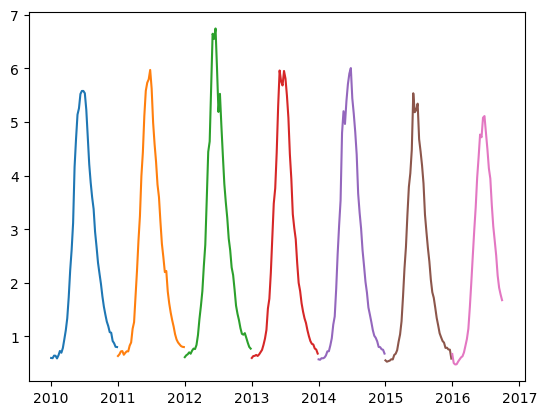

In [63]:

#GL_year = ds_8DayPixelAreaMean_2011To2016.groupby('year.year')

#GL_year
plt.plot(np.array(day_of_year).T,ds_8DayPixelAreaMean_2011To2016.dms)

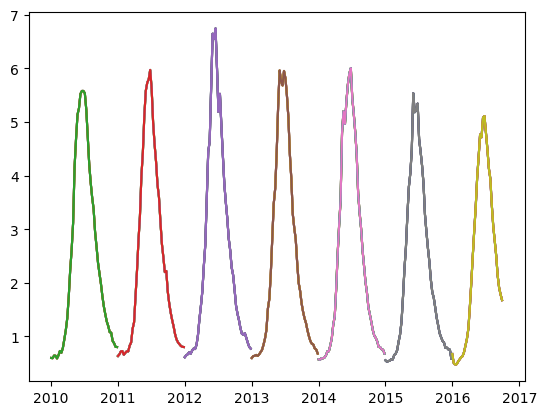

In [64]:
for y in range(2010,2017):
    plt.plot(np.array(day_of_year).T,ds_8DayPixelAreaMean_2011To2016.dms)

In [97]:
ds.year

<xarray.DataArray 'year' (year: 7)>
array([2010., 2011., 2012., 2013., 2014., 2015., 2016.])
Coordinates:
  * year     (year) float64 2.01e+03 2.011e+03 2.012e+03 ... 2.015e+03 2.016e+03

In [121]:

for y in range(2010,2017):
    ax.plot(GL_year['y']['time.dayofyear'],ds_8DayPixelAreaMean_2011To2016.dms, label=y)
    

NameError: name 'GL_year' is not defined

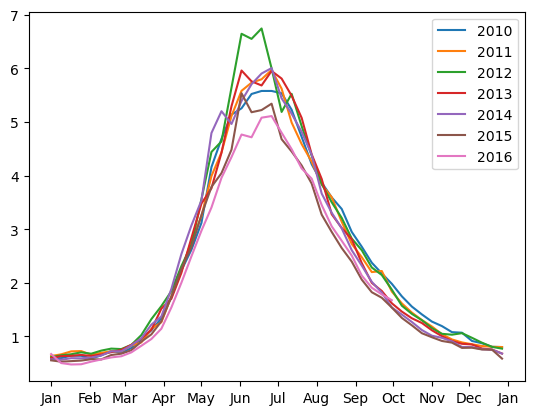

In [132]:
#from matplotlib.ticker import FixedLocator, FixedFormatter
#x_formatter = FixedFormatter(['01-Jan','01-Mar','01-May','01-Jul','01-Sep','01-Nov','01-Jan'])
date_form=mdates.DateFormatter("%b")


import matplotlib.dates as mdates

fig,ax=plt.subplots()
for i in range(7):
#    plt.plot(np.arange(46),ds_8DayPixelAreaMean_2011To2016.dms.isel(year=i))
    ax.plot(day_of_year[0],ds_8DayPixelAreaMean_2011To2016.dms.isel(year=i), label=2010 + i)
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.MonthLocator())    
#   #    ax.xaxis.set_major_formatter(x_formatter)

#ax.set_xticklabels([
plt.legend()


In [133]:
ds_8DayPixelAreaMean_2011To2016

<xarray.Dataset>
Dimensions:      (year: 7, period: 46)
Coordinates:
  * year         (year) float64 2.01e+03 2.011e+03 ... 2.015e+03 2.016e+03
Dimensions without coordinates: period
Data variables:
    longitude    (year) float64 -5.833e-16 -5.833e-16 ... -5.833e-16 -5.833e-16
    latitude     (year) float64 60.32 60.32 60.32 60.32 60.32 60.32 60.32
    startjulday  (year, period) float64 1.0 9.0 17.0 25.0 ... 345.0 353.0 361.0
    endjulday    (year, period) float64 8.0 16.0 24.0 32.0 ... 352.0 360.0 365.0
    dms          (period, year) float64 0.5995 0.6358 0.6142 ... 0.5873 nan

In [135]:
ds_totalAvrg_obs = ds_8DayPixelAreaMean_2011To2016.mean(dim='year').compute()
ds_totalAvrg_obs

<xarray.Dataset>
Dimensions:      (period: 46)
Dimensions without coordinates: period
Data variables:
    longitude    float64 -5.833e-16
    latitude     float64 60.32
    startjulday  (period) float64 1.0 9.0 17.0 25.0 ... 337.0 345.0 353.0 361.0
    endjulday    (period) float64 8.0 16.0 24.0 32.0 ... 344.0 352.0 360.0 365.0
    dms          (period) float64 0.6071 0.5922 0.6123 ... 0.8123 0.7806 0.7214

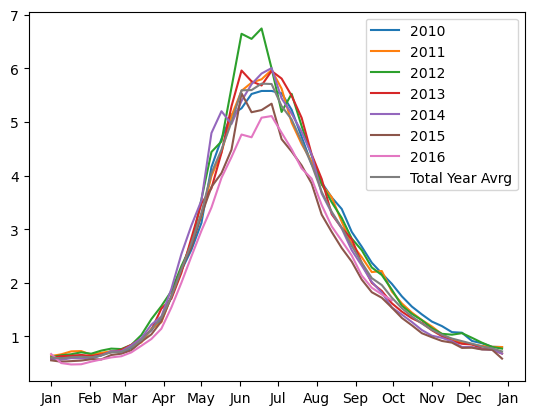

In [140]:
date_form=mdates.DateFormatter("%b")


import matplotlib.dates as mdates

fig,ax=plt.subplots()
for i in range(7):
#    plt.plot(np.arange(46),ds_8DayPixelAreaMean_2011To2016.dms.isel(year=i))
    ax.plot(day_of_year[0],ds_8DayPixelAreaMean_2011To2016.dms.isel(year=i), label=2010 + i)
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.MonthLocator())    
#   #    ax.xaxis.set_major_formatter(x_formatter)
ax.plot(day_of_year[0],ds_totalAvrg_obs.dms, label='Total Year Avrg')
#ax.set_xticklabels([
plt.legend()



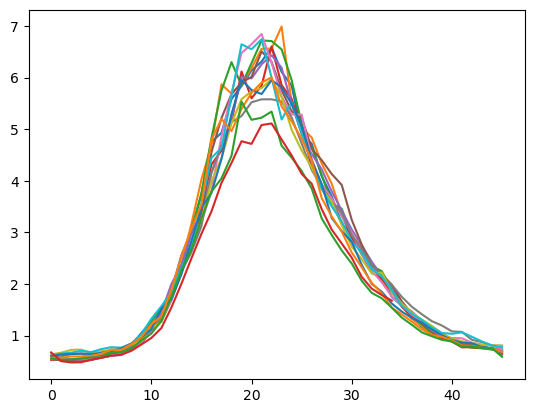

In [7]:
for i in range(14):
    plt.plot(np.arange(46),ds_8DayPixelAreaMean_2011To2016.dms.isel(year=i))


### calculate the annual average from 2011 to 2016

In [8]:
ds_annual_mean_2011To2016 = ds_8DayPixelAreaMean_2011To2016.mean(dim='period').compute() #.compute does the excution of the mean operation
ds_annual_mean_2011To2016

<xarray.Dataset>
Dimensions:      (year: 14)
Coordinates:
  * year         (year) float64 2.003e+03 2.004e+03 ... 2.015e+03 2.016e+03
Data variables:
    longitude    (year) float64 -5.833e-16 -5.833e-16 ... -5.833e-16 -5.833e-16
    latitude     (year) float64 60.32 60.32 60.32 60.32 ... 60.32 60.32 60.32
    startjulday  (year) float64 181.0 181.0 181.0 181.0 ... 181.0 181.0 181.0
    endjulday    (year) float64 187.9 187.9 187.9 187.9 ... 187.9 187.9 187.9
    dms          (year) float64 2.516 2.581 2.583 2.415 ... 2.37 2.126 2.433

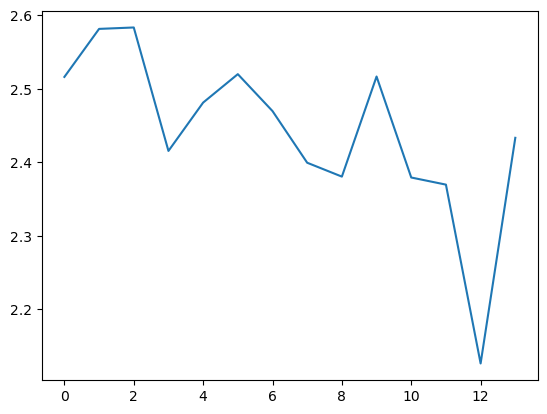

In [9]:
plt.plot(ds_annual_mean_2011To2016.dms)

### select the Arctic area

In [13]:
ds_DMS_2011To2016_Arctic = ds.where((ds.longitude>=-30) & (ds.longitude<=10) & (ds.latitude <= 85) 
                                    & (ds.latitude >= 60),
                         drop=True)
ds_DMS_2011To2016_Arctic

<xarray.Dataset>
Dimensions:      (year: 14, pixel: 4773, period: 46)
Coordinates:
  * year         (year) float64 2.003e+03 2.004e+03 ... 2.015e+03 2.016e+03
Dimensions without coordinates: pixel, period
Data variables:
    longitude    (year, pixel) float64 dask.array<chunksize=(1, 4773), meta=np.ndarray>
    latitude     (year, pixel) float64 dask.array<chunksize=(1, 4773), meta=np.ndarray>
    startjulday  (year, period, pixel) float64 dask.array<chunksize=(1, 46, 4773), meta=np.ndarray>
    endjulday    (year, period, pixel) float64 dask.array<chunksize=(1, 46, 4773), meta=np.ndarray>
    dms          (period, year, pixel) float64 dask.array<chunksize=(46, 1, 4773), meta=np.ndarray>

In [14]:
ds_DMS_8DayPixelAreaMean_Arctic = ds_DMS_2011To2016_Arctic.mean(dim='pixel').compute() #.compute does the excution of the mean operation
ds_DMS_8DayPixelAreaMean_Arctic

<xarray.Dataset>
Dimensions:      (year: 14, period: 46)
Coordinates:
  * year         (year) float64 2.003e+03 2.004e+03 ... 2.015e+03 2.016e+03
Dimensions without coordinates: period
Data variables:
    longitude    (year) float64 -10.0 -10.0 -10.0 -10.0 ... -10.0 -10.0 -10.0
    latitude     (year) float64 69.61 69.61 69.61 69.61 ... 69.61 69.61 69.61
    startjulday  (year, period) float64 1.0 9.0 17.0 25.0 ... 345.0 353.0 361.0
    endjulday    (year, period) float64 8.0 16.0 24.0 32.0 ... 352.0 360.0 365.0
    dms          (period, year) float64 nan nan nan nan nan ... nan nan nan nan

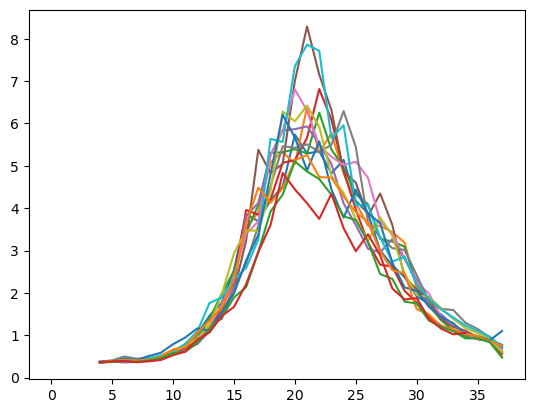

In [18]:
plt.plot(ds_DMS_8DayPixelAreaMean_Arctic.dms)


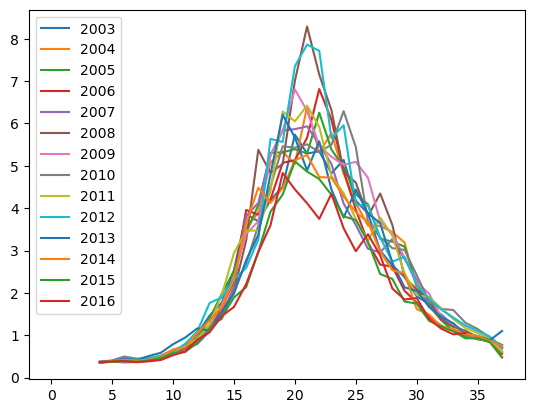

In [46]:
for i in ds_DMS_8DayPixelAreaMean_Arctic.year:
    plt.plot(np.arange(46),ds_DMS_8DayPixelAreaMean_Arctic.dms.sel(year=i),label=int(i.values))
    plt.legend()


# WORKING WITH MULTIPLE DATA
open multiple files of observations

In [11]:
s3file = 's3://escience2022/Ada/monthly/'
s3file

's3://escience2022/Ada/monthly/'

In [12]:
file = s3.open(s3file)
xr.open_mfdataset('s3://escience2022/Ada/monthly/', parallel=True)
file

<File-like object S3FileSystem, escience2022/Ada/monthly>

In [21]:
list_files = glob('s3://escience2022/Ada/monthly/dms_gsm_A*.nc')
list_files

[]

In [8]:
s3file = 's3://escience2022/Ada/monthly/'
s3file
file = s3.open(s3file)
file [for file in s3file.ls(dir) if '' in file]
xr.open_mfdataset('s3://escience2022/Ada/monthly/', parallel=True)

#ds = xr.open_dataset(file)
ds.dmsos

SyntaxError: invalid syntax (2909802434.py, line 4)

### calculate the mean